In [1]:
from google.colab import files
import pandas as pd

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일 이름 확인
file_path = list(uploaded.keys())[0]

# 파일 읽기 (인코딩 확인 후 수정)
try:
    data = pd.read_csv(file_path, encoding='utf-8')  # 기본 utf-8
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='cp949')  # cp949로 시도

# 결측치 처리
# 모든 결측치를 0으로 대체
data.fillna(0, inplace=True)

# 데이터 확인
print(data.head())

Saving 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv to 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 (1).csv
      사용월  호선명 지하철역  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  05시-06시 하차인원  \
0  202411  1호선  동대문           590            18         11507          1945   
1  202411  1호선  동묘앞           180             1          2890           959   
2  202411  1호선  서울역           619            19          8411          8848   
3  202411  1호선   시청            71             0          2029          5239   
4  202411  1호선  신설동           385            21          9307          2313   

   06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원  ...  23시-24시 하차인원  00시-01시 승차인원  \
0          9996          6511         16584  ...          9536           869   
1          3755          5025          9119  ...          4506           137   
2         13670         58234         42622  ...         14302          3414   
3          3818         27038          7955  ...          3948           575   
4         10188          9168         22551

In [2]:
# 07-08시, 08-09시 승차 및 하차 인원 컬럼만 추출
filtered_data = data[['호선명', '지하철역', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원']]

# 데이터 확인
print(filtered_data)

       호선명 지하철역  07시-08시 승차인원  07시-08시 하차인원  08시-09시 승차인원  08시-09시 하차인원
0      1호선  동대문         16584         11007         21998         19645
1      1호선  동묘앞          9119          9155         14269         21391
2      1호선  서울역         42622        113969         78886        238645
3      1호선   시청          7955         73183         10875        193991
4      1호선  신설동         22551         25333         34146         55123
...    ...  ...           ...           ...           ...           ...
70547  중앙선  운길산          1292           675          1479          1390
70548  중앙선   원덕           537           248           823           344
70549  중앙선   중랑         22160          3027         25792          6573
70550  중앙선   팔당          1227           523           910          1151
70551  중앙선   회기         65043         24473         85473         59383

[70552 rows x 6 columns]


In [3]:
# 07-08시 승차 인원 기준 상위 3개 역
top_3_riders_0708 = (
    filtered_data.groupby(['호선명', '지하철역'])['07시-08시 승차인원']
    .sum()
    .reset_index()
    .sort_values(by='07시-08시 승차인원', ascending=False)
    .head(3)
)
print("07-08시 승차 인원 기준 상위 3개 역")
print(top_3_riders_0708)

# 08-09시 승차 인원 기준 상위 3개 역
top_3_riders_0809 = (
    filtered_data.groupby(['호선명', '지하철역'])['08시-09시 승차인원']
    .sum()
    .reset_index()
    .sort_values(by='08시-09시 승차인원', ascending=False)
    .head(3)
)
print("\n08-09시 승차 인원 기준 상위 3개 역")
print(top_3_riders_0809)

# 07-08시 하차 인원 기준 상위 3개 역
top_3_exits_0708 = (
    filtered_data.groupby(['호선명', '지하철역'])['07시-08시 하차인원']
    .sum()
    .reset_index()
    .sort_values(by='07시-08시 하차인원', ascending=False)
    .head(3)
)
print("\n07-08시 하차 인원 기준 상위 3개 역")
print(top_3_exits_0708)

# 08-09시 하차 인원 기준 상위 3개 역
top_3_exits_0809 = (
    filtered_data.groupby(['호선명', '지하철역'])['08시-09시 하차인원']
    .sum()
    .reset_index()
    .sort_values(by='08시-09시 하차인원', ascending=False)
    .head(3)
)
print("\n08-09시 하차 인원 기준 상위 3개 역")
print(top_3_exits_0809)

07-08시 승차 인원 기준 상위 3개 역
    호선명     지하철역  07시-08시 승차인원
46  2호선       신림      25749515
17  2호선  구로디지털단지      17209508
45  2호선      신도림      17110167

08-09시 승차 인원 기준 상위 3개 역
     호선명     지하철역  08시-09시 승차인원
46   2호선       신림      37236263
17   2호선  구로디지털단지      22468469
100  3호선      연신내      19561879

07-08시 하차 인원 기준 상위 3개 역
     호선명 지하철역  07시-08시 하차인원
11   2호선   강남      19554791
190  5호선  여의도      15424388
53   2호선   역삼      15274626

08-09시 하차 인원 기준 상위 3개 역
     호선명     지하철역  08시-09시 하차인원
262  7호선  가산디지털단지      46283616
53   2호선       역삼      41056068
11   2호선       강남      39067570


In [4]:
# 글꼴 설치 및 캐시 초기화
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# NanumGothic 글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib에 글꼴 적용
mpl.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 글꼴 설정 확인
print("현재 설정된 글꼴:", mpl.rcParams['font.family'])

현재 설정된 글꼴: ['NanumGothic']


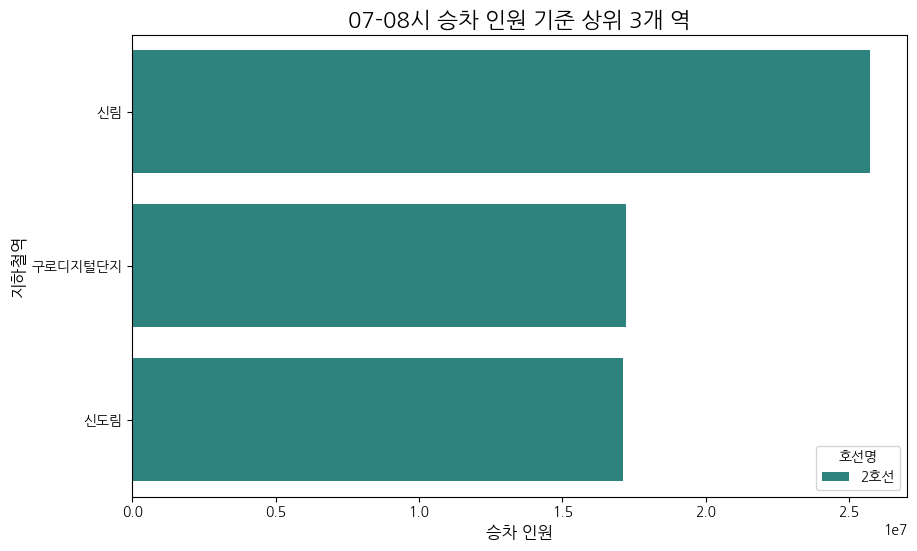

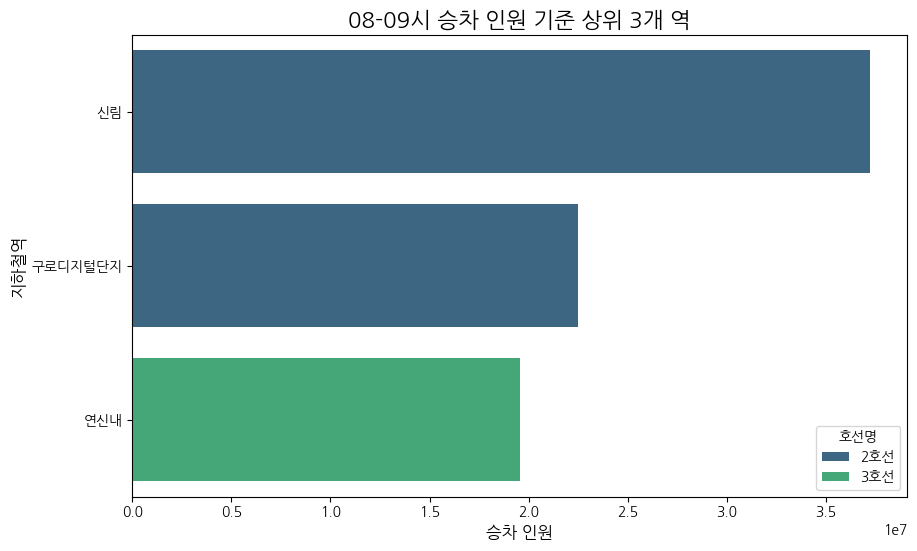

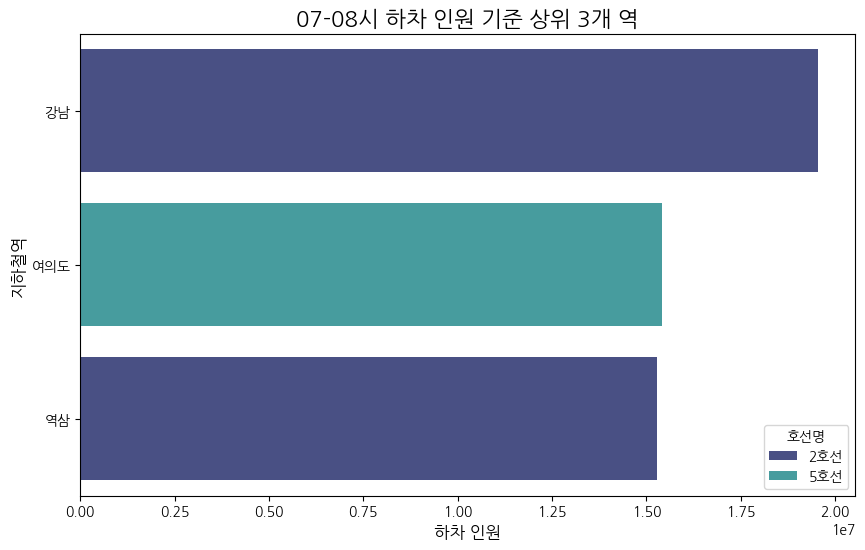

Text(0.5, 1.0, '08-09시 하차 인원 기준 상위 3개 역')

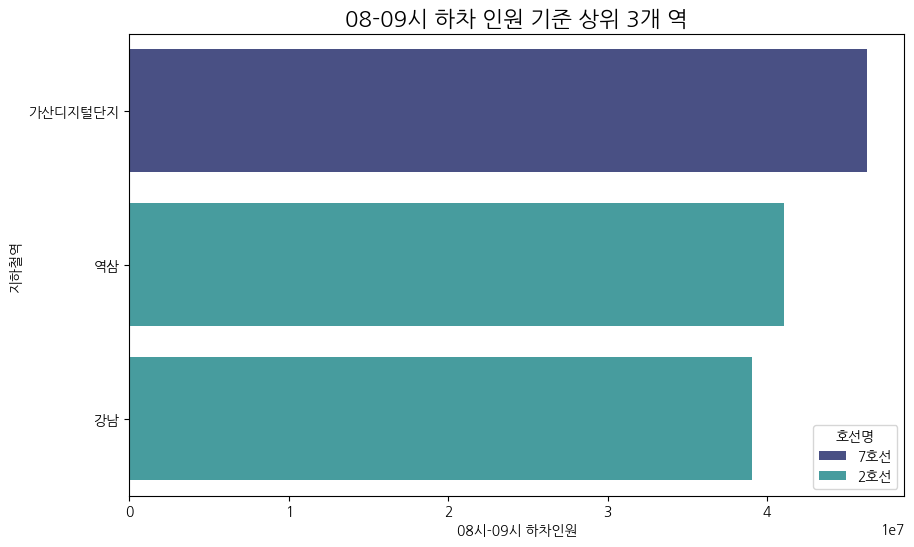

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 07-08시 승차 인원 상위 3개 역 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x="07시-08시 승차인원",
    y="지하철역",
    hue="호선명",
    data=top_3_riders_0708,
    palette="viridis"
)
plt.title("07-08시 승차 인원 기준 상위 3개 역", fontsize=16)
plt.xlabel("승차 인원", fontsize=12)
plt.ylabel("지하철역", fontsize=12)
plt.legend(title="호선명")
plt.show()

# 08-09시 승차 인원 상위 3개 역 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x="08시-09시 승차인원",
    y="지하철역",
    hue="호선명",
    data=top_3_riders_0809,
    palette="viridis"
)
plt.title("08-09시 승차 인원 기준 상위 3개 역", fontsize=16)
plt.xlabel("승차 인원", fontsize=12)
plt.ylabel("지하철역", fontsize=12)
plt.legend(title="호선명")
plt.show()

# 07-08시 하차 인원 상위 3개 역 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x="07시-08시 하차인원",
    y="지하철역",
    hue="호선명",
    data=top_3_exits_0708,
    palette="mako"
)
plt.title("07-08시 하차 인원 기준 상위 3개 역", fontsize=16)
plt.xlabel("하차 인원", fontsize=12)
plt.ylabel("지하철역", fontsize=12)
plt.legend(title="호선명")
plt.show()

# 08-09시 하차 인원 상위 3개 역 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x="08시-09시 하차인원",
    y="지하철역",
    hue="호선명",
    data=top_3_exits_0809,
    palette="mako"
)
plt.title("08-09시 하차 인원 기준 상위 3개 역", fontsize=16)